# Self Optimizing clustering(SOC)

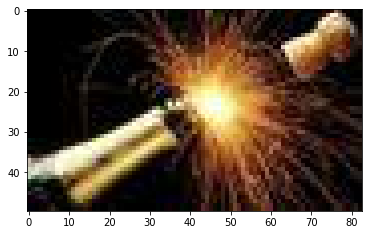

GSI val:  0.363359237608202
GSI val:  0.3738854632344397
GSI val:  0.35798943717219744
GSI val:  0.38851484339703396
GSI val:  0.3772970712291373
GSI val:  0.3887745092071731
GSI val:  0.3743819155882786
GSI val:  0.3873548425389545
GSI val:  0.3870305639740778
GSI val:  0.37989522410488835


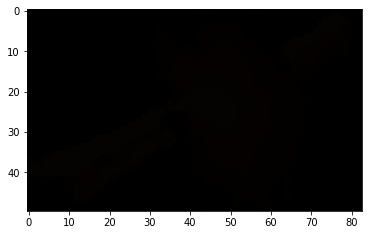

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import distance_matrix as dis
from skimage import color
import copy as cp


def lagrangeint(x,y,k):#Functions that return the coefficient of the polynomial
    coeff=0
    for i in range(k):
        p=np.poly(x[np.arange(k)!=i])
        coeff=coeff+y[i]*p/(np.polyval(p,x[i]))
    return coeff


def GSI(sm):
    print('GSI val: ',np.average(sm))

    
def normalize(data):
    dcmin=np.min(data,axis=0)
    dcmax=np.max(data,axis=0)
    return (data-dcmin)/(dcmax-dcmin)


def denormalize(data):
    dcmin=np.min(data,axis=0)
    dcmax=np.max(data,axis=0)
    dt=data*(data-dcmin)+dcmin
    
    
def sm(dt,clustarr,k):
    silval=np.zeros(k)
    for i in range(k):
        p=0
        index=np.where(clustarr==i+1)[0]
        d1=dt[index]
        Nm=len(index)
        a=np.sum(dis(d1,d1),axis=1)/(Nm-1)
        dist=np.zeros((Nm,k-1))
        for j in range(k):
            if i!=j:
                index1=np.where(clustarr==j+1)[0]
                Nk=len(index1)
                dk=dt[index1]
                dist[:,p]=np.sum(dis(d1,dk),axis=1)/(Nk)
                p=p+1
        b=np.min(dist,axis=1)
        silval[i]=np.average((b-a)/np.max([a,b],axis=0))
    return(silval)
             

def exact_root(coeff):
    roots=np.roots(coeff)
    c=roots[roots.imag==0]
    return c.real[0]



# def pmrf(bm,d1,dm):
#     p,q=d1.shape
#     pm=np.zeros(p)
#     div=2
#     for i in range(2):
#     print(pm)    
    
def soc(data,n,k):
    dt=normalize(data)
    p,q=dt.shape
    c=np.zeros((k,q))
    dm=np.zeros(k)
    bm=np.ones(k)   #optimizing factor
    
    for j in range(n):
        clustarr=np.zeros(p,dtype=int)#sets the location
        for i in range(k):
            indx_0=np.where(clustarr==0)[0]
            d1=dt[indx_0]
            p1,q1=d1.shape
            dm[i]=(1/(2*p1))*np.sum(np.min(d1,axis=1)/np.sum(d1,axis=1))*bm[i]
            pmr=np.sum(np.exp(-dis(d1,d1)**2/dm[i]**2),axis=1) ########
            c[i,:]=d1[np.argmax(pmr)]
            disarray=dis(c[i,:].reshape(1,q1),d1).reshape(p1)
            
            indx_1=np.where(disarray**2<=dm[i])[0]
            clustarr[indx_0[indx_1]]=i+1
        
        indx_0=np.where(clustarr==0)[0]
        d1=dt[indx_0]
        disarray=dis(c,d1)
        dcmin=np.argmin(disarray,axis=0)
        #distributing extra points
        for j in range(len(dcmin)):
            clustarr[indx_0[j]]=dcmin[j]+1
            
        silval=sm(dt,clustarr,k)  
        GSI(silval)
        lagcoeff=lagrangeint(dm,silval,k)
        lagcoeff[-1]-=1   #finding the zeros
        bm=exact_root(lagcoeff)/dm
        d1 = denormalize(data)
    coll=np.zeros((p,q))

    for j in range(k):
        m=np.where(clustarr==j+1)
#         if len(data[m]!=0):
        coll[m]=c[j,:]
    return coll
            
    

k=6#numbers of clusters
n=10#No of iteration

# l=[[5,6,3],[2,9,7],[4,8,6],[2,1,4]]
# dat=np.array(l)
# soc(dat,n,k)


img = mpimg.imread('p2.jpg')
plt.imshow(img)
plt.show()
dat=color.rgb2lab(img.reshape(-1,3))
data=color.lab2rgb(soc(dat,n,k))
data=data.reshape(img.shape)
plt.imshow(data)
plt.show()
